In [140]:
### Let's read a sample audio using librosa
import librosa
audio_file_path=r'D:\SSN Internship Research\trial_covid\cough-shallow-3CwioNQVDBQ6CttLyFVRJpMpVHk2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [141]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00636538 -0.00505538
  0.        ]


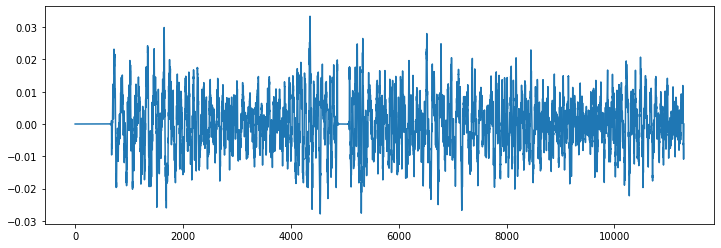

In [142]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [143]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [144]:
wave_audio

array([   0,    0,    0, ..., -144, -162, -210], dtype=int16)

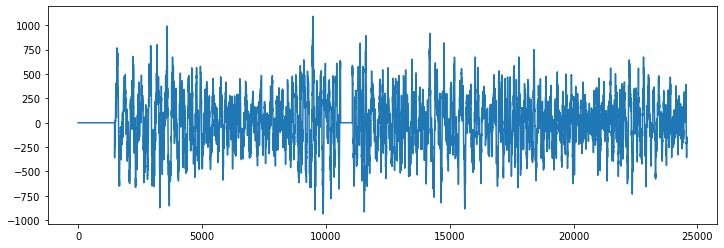

In [145]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [146]:
#Extracting Features
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 23)


In [147]:
mfccs

array([[-5.39756287e+02, -3.90280212e+02, -3.32766876e+02,
        -3.22983887e+02, -3.32247742e+02, -3.42123291e+02,
        -3.49549530e+02, -3.44929138e+02, -3.25793396e+02,
        -3.19916107e+02, -3.25104004e+02, -3.27653931e+02,
        -3.35147797e+02, -3.39730743e+02, -3.52996979e+02,
        -3.56064850e+02, -3.45806702e+02, -3.46966370e+02,
        -3.56277893e+02, -3.57082367e+02, -3.53841431e+02,
        -3.56963348e+02, -3.62053375e+02],
       [ 1.28962250e+02,  1.13819069e+02,  1.04724579e+02,
         9.56399002e+01,  9.13809052e+01,  9.14531403e+01,
         9.24917297e+01,  9.87945404e+01,  1.01155060e+02,
         1.05280746e+02,  1.10378189e+02,  1.11470863e+02,
         1.17887947e+02,  1.20192673e+02,  1.16826241e+02,
         1.09661324e+02,  1.00967880e+02,  1.02094666e+02,
         1.00208824e+02,  1.03735657e+02,  1.09552963e+02,
         1.11254852e+02,  1.02942986e+02],
       [ 1.45600033e+01,  1.10011530e+01,  7.75002003e+00,
         9.40984535e+00,  8.5

In [148]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'D:\SSN Internship Research\trial_covid'
metadata = pd.read_csv(r'D:\SSN Internship Research\cough_trial_extended.csv')
metadata.head()

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
4,cov1.wav,covid


In [149]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [150]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_properties"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

170it [00:04, 39.05it/s]


In [151]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-383.04538, 108.19174, -34.388645, 1.9728788,...",not_covid
1,"[-458.21454, 66.42321, -26.776094, 47.934288, ...",not_covid
2,"[-341.46753, 65.2773, -9.3593025, 13.447259, 3...",not_covid
3,"[-318.0074, 72.54776, -10.081922, 9.191696, 7....",not_covid
4,"[-340.77936, 104.42588, -32.49428, -13.354953,...",covid


In [152]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [153]:
X.shape

(170, 40)

In [154]:
y

array(['not_covid', 'not_covid', 'not_covid', 'not_covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
       'not_covid', 'not_covid', 'not_covid', 'not_covid', 'not_covid',
   

In [155]:
### Label Encoding
# y=np.array(pd.get_dummies(y))

### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [156]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [157]:
y.shape

(170, 2)

In [158]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [159]:
X_train

array([[-5.8454388e+02,  3.6529083e+01,  1.6555378e+01, ...,
         3.2276955e-01,  3.5356653e-01, -3.5911998e-01],
       [-3.4030438e+02,  5.6140980e+01, -1.0389645e+01, ...,
         1.3674790e+00, -2.7996963e-01, -1.2284366e+00],
       [-4.3457022e+02,  1.0393459e+02, -6.7272980e+01, ...,
         1.9250069e+00,  1.1113784e+00,  9.6843493e-01],
       ...,
       [-4.5821454e+02,  6.6423210e+01, -2.6776094e+01, ...,
         1.8707353e-01, -2.6361532e+00,  7.7240884e-01],
       [-1.5784883e+02,  9.8038338e+01, -5.6263535e+01, ...,
        -1.9252155e+00, -4.1575691e-01, -4.1722431e+00],
       [-3.1378879e+02,  7.5733162e+01, -6.6652656e+00, ...,
        -2.3199887e+00, -2.3938856e+00, -3.1897157e-01]], dtype=float32)

In [160]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [161]:
X_train.shape

(136, 40)

In [162]:
X_test.shape

(34, 40)

In [163]:
y_train.shape

(136, 2)

In [164]:
y_test.shape

(34, 2)

In [165]:
#Model Creation
import tensorflow as tf
print(tf.__version__)

2.5.0


In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [167]:
### No of classes
num_labels=y.shape[1]

In [168]:
#Creating an ANN

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [169]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [170]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [171]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=r'D:\SSN Internship Research\audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 14.3754 - accuracy: 0.7206 - val_loss: 7.4920 - val_accuracy: 0.8529

Epoch 00001: val_loss improved from inf to 7.49203, saving model to D:\SSN Internship Research\audio_classification.hdf5
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 10.4045 - accuracy: 0.8382 - val_loss: 8.6017 - val_accuracy: 0.8529

Epoch 00002: val_loss did not improve from 7.49203
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 11.4560 - accuracy: 0.7794 - val_loss: 7.2019 - val_accuracy: 0.8529

Epoch 00003: val_loss improved from 7.49203 to 7.20189, saving model to D:\SSN Internship Research\audio_classification.hdf5
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 11.8517 - accuracy: 0.8309 - val_loss: 5.3974 - val_accuracy: 0.8529

Epoch 00004: val_loss improved from 7.20189 to 5.39736, saving model to D:\SSN Internship Research\audio_classification.hdf5
Epoch 5/100
5

In [172]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8529411554336548


In [173]:
filename=r'D:\SSN Internship Research\trial_covid\pos-0421-087-cough-f-40.wav'
# prediction_feature = features_extractor(filename)
# prediction_feature = prediction_feature.reshape(1,-1)
# model.predict_classes(prediction_feature)


audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class


[-3.9186172e+02  5.7310341e+01 -1.5040326e+01  1.1309663e+01
 -1.3795527e+01  4.4070870e-01 -1.6227907e+01 -7.8756132e+00
 -4.3693647e+00 -1.5024798e+00 -3.7660685e+00 -8.8138247e+00
 -2.3324170e+00 -8.5392389e+00 -3.9028456e+00 -6.5746269e+00
 -6.2968059e+00 -4.9686947e+00 -5.5030584e-01 -4.4053912e+00
 -4.5709095e+00  3.5933036e-01 -4.1962719e+00 -2.3783855e+00
 -2.8483284e+00 -7.7700019e-01 -3.1264908e+00 -1.3317907e+00
 -2.1739316e-01 -2.9609139e+00 -2.7149374e+00 -2.8145626e+00
 -1.9685420e+00 -3.3120484e+00 -1.5584034e+00 -2.6750963e+00
 -1.5288305e+00 -5.9415138e-01 -5.7307076e-01 -1.3308027e-01]
[[-3.9186172e+02  5.7310341e+01 -1.5040326e+01  1.1309663e+01
  -1.3795527e+01  4.4070870e-01 -1.6227907e+01 -7.8756132e+00
  -4.3693647e+00 -1.5024798e+00 -3.7660685e+00 -8.8138247e+00
  -2.3324170e+00 -8.5392389e+00 -3.9028456e+00 -6.5746269e+00
  -6.2968059e+00 -4.9686947e+00 -5.5030584e-01 -4.4053912e+00
  -4.5709095e+00  3.5933036e-01 -4.1962719e+00 -2.3783855e+00
  -2.8483284e+00 

c:\users\abhis\pyproj\my_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['not_covid'], dtype='<U9')